In [1]:
from __future__ import print_function
import argparse
import shutil

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from numpy import mean, sqrt, square, arange
import pandas as pd

import logging
import csv

import os
from os.path import exists
import datetime
import time

import shutil


from wfdb import processing


In [200]:
columns = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'C1', 'Resp', 'UTC', 'DA', 'Conf']
columns_rest = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'C1', 'Resp']
sampling_rate = 300


In [248]:
file_path = "../../Data/LoHP/MultiRecordFiles/VP10_Scenario2_MRF.csv"

df = pd.read_csv(file_path, delimiter=',', usecols=columns)

In [189]:
file_path = "../../Data/LoHP/MultiRecordFiles/VP17_RuheEKG.csv"

df = pd.read_csv(file_path, delimiter=',', usecols=columns_rest)

In [249]:
df.shape

(1167633, 11)

In [27]:
df_list = []

In [29]:
file_path_pred = "../../LSTM/Predictions_SPO/prediction_VP10_Scenario2_0_MRF.csv"

df_pred_t = pd.read_csv(file_path_pred)
df_list.extend(df_pred_t.values[0])

In [ ]:
file_path_pred = "../../LSTM/Predictions_LoHP/prediction_P24Sc2MRF_mV.csv"

df_pred_t = pd.read_csv(file_path_pred)
df_list.extend(df_pred_t.values[0])

In [30]:
len(df_list)

108301

In [6]:
df_p = pd.DataFrame(df_list, columns=['Pred'], dtype='float64')

In [7]:
df_p.dtypes

Pred    float64
dtype: object

In [145]:
df.max(axis=1)

0          1.666188e+09
1          1.666188e+09
2          1.666188e+09
3          1.666188e+09
4          1.666188e+09
               ...     
1208346    1.666192e+09
1208347    1.666192e+09
1208348    1.666192e+09
1208349    1.666192e+09
1208350    1.666192e+09
Length: 1208351, dtype: float64

In [36]:
df.min(axis=1)

0         63
1         61
2         59
3         58
4         56
          ..
589515    86
589516    87
589517    87
589518    87
589519    86
Length: 589520, dtype: int64

In [20]:
df.shape

(113400, 3)

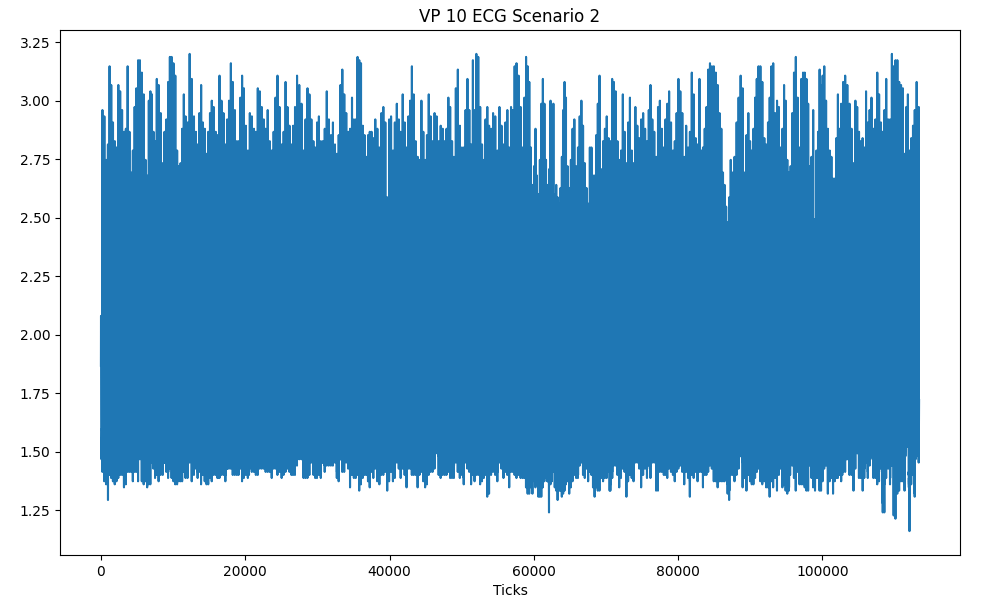

In [32]:
%matplotlib widget
plt.clf()
plt.rcParams["figure.figsize"] = (10,6)
plt.title("VP 10 ECG Scenario 2")
plt.plot(df.iloc[:,1])
#plt.xlim(0,620)
#plt.ylim(12,27)
#plt.xlim(60200,61800)
plt.xlabel("Ticks")
plt.subplots_adjust(
    left=0.06,
    bottom=0.075,
    right=0.96,
    top=0.95,
    hspace=0.025)
#plt.savefig(f"PDF/GMLF_VP10_Scenario2_ECG_exerpt.pdf", format="pdf")

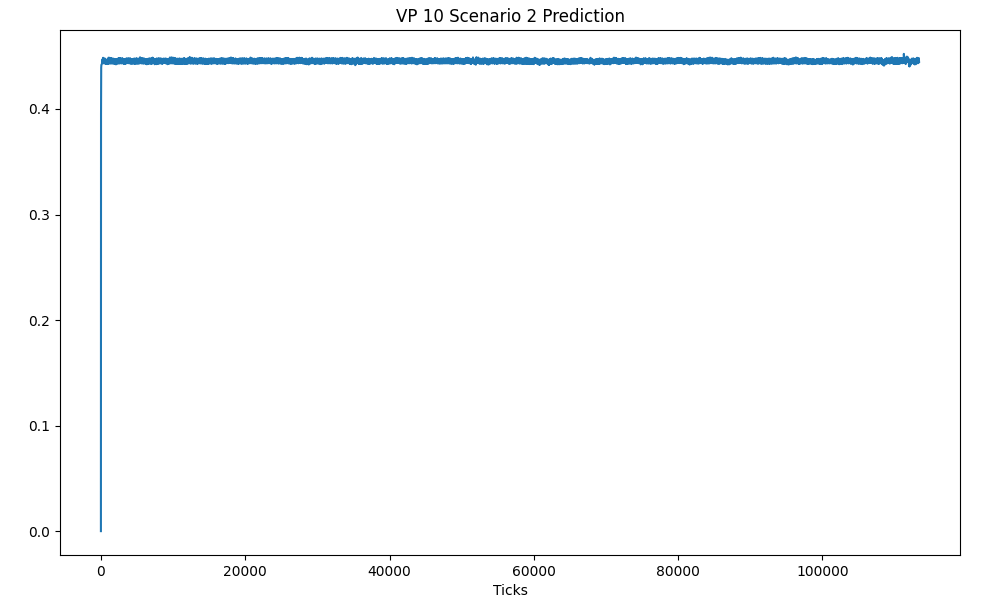

In [31]:
%matplotlib widget
plt.clf()
plt.rcParams["figure.figsize"] = (10,6)
data = (df_p['Pred'])
plt.title("VP 10 Scenario 2 Prediction")
plt.xlabel("Ticks")

plt.plot(data)

#plt.ylim(0.2655,.26650)
#plt.ylim(0,1)

#plt.xlim(60200,61800)

plt.subplots_adjust(
    left=0.06,
    bottom=0.075,
    right=0.96,
    top=0.95,
    hspace=0.025)
#plt.savefig(f"PDF/GMLF_predVP10_Scenario2_exerpt.pdf", format="pdf")

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


<function matplotlib.pyplot.show(block=None)>

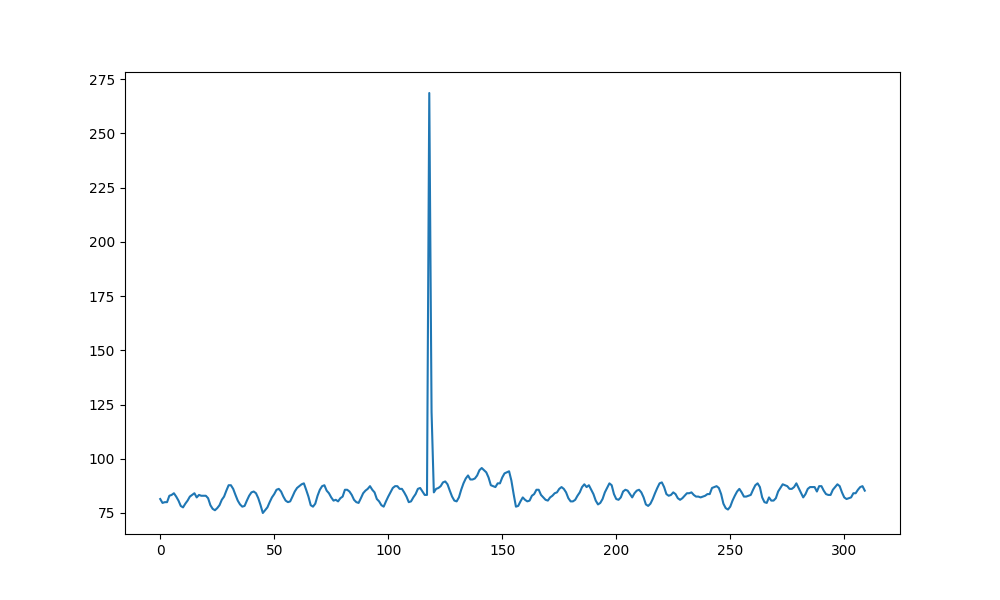

In [203]:
%matplotlib widget

xqrs = processing.XQRS(sig=df['II'], fs=sampling_rate)
            
xqrs.detect()

# XQRS inds in samples -> to seconds divide by sampling rate
# From seconds to ms multipy by 1000
rr = np.diff(xqrs.qrs_inds)*1000 / sampling_rate

# From ms to min divide rr by 60000
heart_rate_r2 = 60 * 1000 / rr
plt.plot(heart_rate_r2)
plt.show

In [8]:
%matplotlib widget

xqrs = processing.XQRS(sig=(df_p['Pred']-0.265)*100, fs=300)
            
xqrs.detect()

# XQRS inds in samples -> to seconds divide by sampling rate
# From seconds to ms multipy by 1000
rr = np.diff(xqrs.qrs_inds)*1000 / sampling_rate

# From ms to min divide rr by 60000
heart_rate_r2 = 60 * 1000 / rr
xqrs.qrs_inds

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


NameError: name 'sampling_rate' is not defined